## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### 1. Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import warnings
from sklearn.datasets import load_boston
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

In [2]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.06711575, 0.91257743, 0.0481548 ],
       [0.00514292, 0.18742108, 0.51760714],
       [0.36675833, 0.43248128, 0.24264116],
       [0.39869674, 0.44038227, 0.27544243],
       [0.39680638, 0.45566983, 0.21018391]])

In [3]:
print(f"Размеры: {a.shape}")

Размеры: (5, 3)


In [4]:
print(f"Добавили 5:\n{a + 5}")

Добавили 5:
[[5.06711575 5.91257743 5.0481548 ]
 [5.00514292 5.18742108 5.51760714]
 [5.36675833 5.43248128 5.24264116]
 [5.39869674 5.44038227 5.27544243]
 [5.39680638 5.45566983 5.21018391]]


In [5]:
print(f"Посчитали произведение X X^T:\n{a @ a.T}")

Посчитали произведение X X^T:
[[0.83962097 0.19630669 0.43097225 0.44190563 0.45258732]
 [0.19630669 0.30307026 0.20853512 0.22715836 0.19623557]
 [0.43097225 0.20853512 0.38042646 0.40351611 0.39359998]
 [0.44190563 0.22715836 0.40351611 0.42876417 0.41676789]
 [0.45258732 0.19623557 0.39359998 0.41676789 0.40926757]]


In [6]:
print(f"Среднее по колонкам:\n{a.mean(axis=-1)}")

Среднее по колонкам:
[0.34261599 0.23672371 0.34729359 0.37150715 0.35422004]


In [7]:
print(f"Изменили размеры: {a.reshape(3, 5).shape}")

Изменили размеры: (3, 5)


#### Разминка.

При помощи numpy посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [8]:
# your code here
np.square(np.arange(1,10001)).sum(dtype=np.int64)

333383335000

Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [9]:
x = torch.rand(5, 3)
x

tensor([[0.0998, 0.3757, 0.9135],
        [0.7454, 0.3400, 0.2531],
        [0.9746, 0.4501, 0.0568],
        [0.9385, 0.9574, 0.9625],
        [0.2175, 0.2798, 0.2172]])

In [10]:
print(f"Размеры: {x.shape}")

Размеры: torch.Size([5, 3])


In [11]:
print(f"Добавили 5:\n{x + 5}")

Добавили 5:
tensor([[5.0998, 5.3757, 5.9135],
        [5.7454, 5.3400, 5.2531],
        [5.9746, 5.4501, 5.0568],
        [5.9385, 5.9574, 5.9625],
        [5.2175, 5.2798, 5.2172]])


In [12]:
# для перемножения тензоров высокой размерности читайте документацию по различным вариантам:
# torch.mm, torch.matmul, torch.bmm, @
print(f"X X^T  (1):\n{torch.matmul(x, x.transpose(1, 0))}\n")
print(f"X X^T  (2):\n{x.mm(x.t())}")

X X^T  (1):
tensor([[0.9855, 0.4334, 0.3183, 1.3326, 0.3252],
        [0.4334, 0.7352, 0.8939, 1.2687, 0.3122],
        [0.3183, 0.8939, 1.1558, 1.4004, 0.3502],
        [1.3326, 1.2687, 1.4004, 2.7238, 0.6810],
        [0.3252, 0.3122, 0.3502, 0.6810, 0.1727]])

X X^T  (2):
tensor([[0.9855, 0.4334, 0.3183, 1.3326, 0.3252],
        [0.4334, 0.7352, 0.8939, 1.2687, 0.3122],
        [0.3183, 0.8939, 1.1558, 1.4004, 0.3502],
        [1.3326, 1.2687, 1.4004, 2.7238, 0.6810],
        [0.3252, 0.3122, 0.3502, 0.6810, 0.1727]])


In [13]:
print(f"Среднее по колонкам:\n{x.mean(dim=-1)}")

Среднее по колонкам:
tensor([0.4630, 0.4462, 0.4939, 0.9528, 0.2381])


In [14]:
print(f"Изменили размеры:\n{x.view([3, 5]).shape}\n")

# будьте внимательны и не используйте view для транспонирования осей
print(f"По-другому изменили размеры:\n{x.view_as(x.t()).shape}\n")
print(f"Но не транспонировали!\n{x.view_as(x.t()) == x.t()}")

Изменили размеры:
torch.Size([3, 5])

По-другому изменили размеры:
torch.Size([3, 5])

Но не транспонировали!
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])


Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [16]:
# your code here
torch.square(torch.arange(1, 10001)).sum().item()

333383335000

### 2. Создаем тензоры в pytorch и снова изучаем базовые операции

In [17]:
x = torch.empty(5, 3)  # пустой тензор
print(x)

tensor([[-6.2841e-39,  4.5616e-41, -6.2841e-39],
        [ 4.5616e-41,  2.3369e-35,  0.0000e+00],
        [        nan,  4.5616e-41,  4.5673e-35],
        [ 0.0000e+00,  0.0000e+00,  7.0065e-45],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [18]:
x = torch.rand(5, 3)  # случайный тензор
print(x)

tensor([[0.2481, 0.3427, 0.6010],
        [0.0020, 0.4134, 0.5615],
        [0.9915, 0.5450, 0.9636],
        [0.6075, 0.2293, 0.9203],
        [0.3306, 0.6714, 0.7286]])


In [19]:
x = torch.zeros(5, 3, dtype=torch.float32)  # тензор с нулями и указанием типов чисел
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [20]:
x = torch.tensor([5.5, 3])  # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [21]:
x1 = x.new_ones(5, 3, dtype=torch.double)  # используем уже созданный тензор для создания тензора из единичек
print(x, x.size()) 

tensor([5.5000, 3.0000]) torch.Size([2])


In [22]:
x = torch.randn_like(x1, dtype=torch.float)  # создаем случайный тензор с размерами x
print(x, x.size())

tensor([[ 2.1061, -1.0847, -0.2486],
        [ 1.1406,  1.6954, -1.4197],
        [ 0.2187,  1.1822,  1.2409],
        [ 1.2693, -0.5258, -0.4283],
        [ 1.5792, -1.1587,  0.2096]]) torch.Size([5, 3])


In [23]:
y = torch.rand(5, 3)
print(x + y)  # операция сложения

tensor([[ 2.8047, -0.6455,  0.7294],
        [ 1.3130,  1.8418, -1.2707],
        [ 0.5957,  1.2720,  1.2543],
        [ 1.6701,  0.1972,  0.2598],
        [ 2.5125, -0.4886,  0.5301]])


In [24]:
z = torch.add(x, y)  # очередная операция сложения
print(z)

tensor([[ 2.8047, -0.6455,  0.7294],
        [ 1.3130,  1.8418, -1.2707],
        [ 0.5957,  1.2720,  1.2543],
        [ 1.6701,  0.1972,  0.2598],
        [ 2.5125, -0.4886,  0.5301]])


In [25]:
torch.add(x, y, out=z)  # и наконец последний вид
print(z)

tensor([[ 2.8047, -0.6455,  0.7294],
        [ 1.3130,  1.8418, -1.2707],
        [ 0.5957,  1.2720,  1.2543],
        [ 1.6701,  0.1972,  0.2598],
        [ 2.5125, -0.4886,  0.5301]])


In [26]:
print(x * y)  # поэлементное умножение

tensor([[ 1.4713, -0.4764, -0.2432],
        [ 0.1966,  0.2483, -0.2116],
        [ 0.0824,  0.1063,  0.0166],
        [ 0.5087, -0.3802, -0.2947],
        [ 1.4738, -0.7763,  0.0672]])


In [27]:
print(x @ y.t())  # матричное умножение

tensor([[ 0.7518,  0.1672,  0.6932, -0.1113,  1.1591],
        [ 0.1529,  0.2333,  0.5634,  0.7061,  1.7454],
        [ 1.8856,  0.3958,  0.2053,  1.7963,  1.3939],
        [ 0.2369,  0.0780,  0.4255, -0.1662,  0.6950],
        [ 0.7994,  0.1338,  0.4940, -0.0607,  0.7647]])


In [28]:
print(x.mm(y.t()))  # и опять матричное умножение

tensor([[ 0.7518,  0.1672,  0.6932, -0.1113,  1.1591],
        [ 0.1529,  0.2333,  0.5634,  0.7061,  1.7454],
        [ 1.8856,  0.3958,  0.2053,  1.7963,  1.3939],
        [ 0.2369,  0.0780,  0.4255, -0.1662,  0.6950],
        [ 0.7994,  0.1338,  0.4940, -0.0607,  0.7647]])


In [29]:
print(x.unsqueeze(0).shape)  # добавили измерение в начало, аналог броадкастинга

torch.Size([1, 5, 3])


In [30]:
print(x.unsqueeze(0).unsqueeze(1).squeeze().shape)  # убрали измерение в начале

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [31]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### 3. Работаем с градиентами руками

In [32]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    boston = load_boston()

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

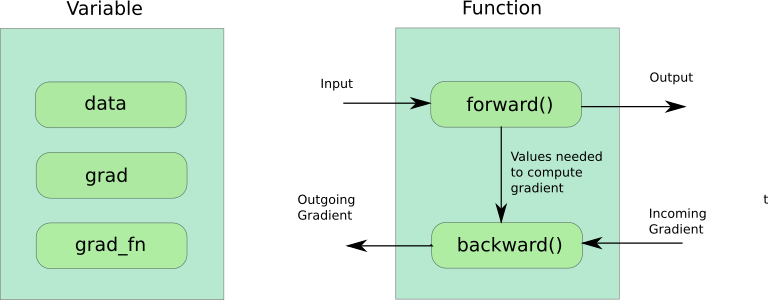

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиент для всех тензоров, у которых `requires_grad=True`.

In [34]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [35]:
y_pred = w * x + b                    # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y) ** 2)  # совершаем операции с тензорами
loss.backward()                       # считаем градиенты

In [36]:
# сделали операции и посчитали градиенты, значение должно было появиться
assert w.grad is not None
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-11.9203])
dL/db = 
 tensor([-43.4226])


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [37]:
w.data

tensor([0.0417])

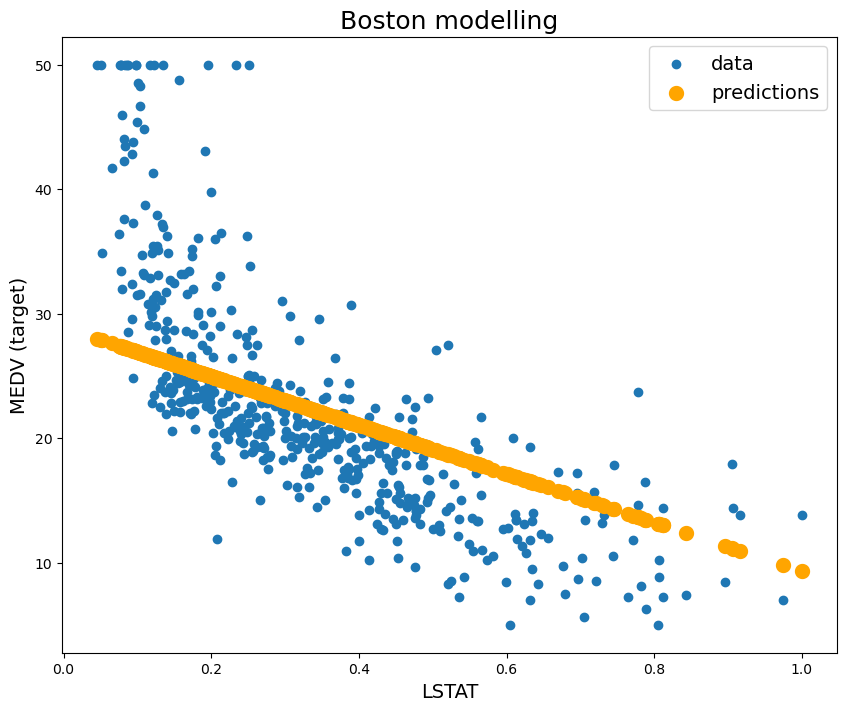

loss =  48.09997


In [38]:
from IPython.display import clear_output

for i in range(300):
    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -=  0.05 * w.grad
    b.data -=  0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10,8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color="orange", linewidth=5, label="predictions")
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break


### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса **должно быть** два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [39]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(x[idx, :], dtype=torch.float), "target": y[idx]}

In [40]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [43]:
our_dataset = RandomDataset(x, y)

In [44]:
our_dataset.__getitem__(1)

{'sample': tensor([0.4204, 0.8726, 0.4272, 0.7332, 0.0996]),
 'target': 0.7156054937910181}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [45]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [46]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")

Sample:
tensor([[0.5053, 0.9913, 0.3011, 0.9191, 0.9306],
        [0.4204, 0.8726, 0.4272, 0.7332, 0.0996],
        [0.5373, 0.5726, 0.5469, 0.8208, 0.5134],
        [0.2157, 0.1526, 0.5902, 0.2372, 0.0291]])
Target:
tensor([0.0302, 0.7156, 0.6683, 0.6460], dtype=torch.float64)


#### Как сделать нейросеть

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [47]:
model = nn.Sequential()                   # создаем пустую модель, в которую будем добавлять слои
model.add_module("l1", nn.Linear(5, 10))  # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module("l2", nn.ReLU())         # добавили функцию активации
model.add_module("l3", nn.Linear(10, 1))  # добавили слой с 3-мя нейронами на вход и 5-ю на выход

# альтернативный способ
another_model = nn.Sequential(
    nn.Linear(5, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

In [48]:
y_pred = model(batch['sample']) # получили предсказания модели

In [49]:
y_pred

tensor([[-0.0551],
        [-0.1019],
        [-0.0885],
        [-0.1033]], grad_fn=<AddmmBackward0>)

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [50]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", 
    train=True, 
    download=True, 
    transform=torchvision.transforms.ToTensor()
) 
mnist_val = torchvision.datasets.MNIST(
    "./mnist/",
    train=False, 
    download=True,
    transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
) 

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, 
    batch_size=4, 
    shuffle=True, 
    num_workers=1
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



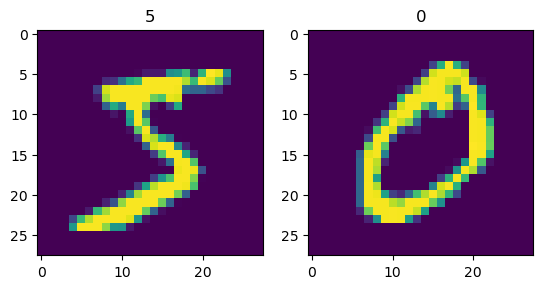

In [52]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [53]:
model = nn.Sequential(
    nn.Flatten(),             # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(28 * 28, 128),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),                # нелинейность
    nn.Linear(128, 10),       # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) 

Веса моделей хранятся в виде матриц и выглядят так:

In [54]:
[x for x in model.named_parameters()] 

[('1.weight',
  Parameter containing:
  tensor([[ 0.0271,  0.0314, -0.0338,  ...,  0.0122,  0.0084,  0.0309],
          [ 0.0055,  0.0225,  0.0254,  ...,  0.0171,  0.0105,  0.0320],
          [ 0.0056,  0.0325,  0.0077,  ..., -0.0100, -0.0275,  0.0347],
          ...,
          [-0.0068, -0.0091,  0.0177,  ..., -0.0245,  0.0121, -0.0083],
          [ 0.0341, -0.0223,  0.0125,  ...,  0.0187, -0.0040, -0.0103],
          [ 0.0114, -0.0233, -0.0028,  ..., -0.0333,  0.0117, -0.0202]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([ 0.0272,  0.0069,  0.0030,  0.0155,  0.0124,  0.0346,  0.0262, -0.0221,
           0.0326,  0.0091, -0.0176,  0.0062,  0.0151,  0.0074, -0.0188, -0.0022,
           0.0096,  0.0150, -0.0299, -0.0156, -0.0268, -0.0095, -0.0223,  0.0144,
           0.0305,  0.0214,  0.0041,  0.0155,  0.0331,  0.0133, -0.0307,  0.0221,
          -0.0130,  0.0104,  0.0132,  0.0004,  0.0218,  0.0248, -0.0330,  0.0019,
           0.0294, -0.0225, -0.0328, 

_Красиво_ трекать метрики в полуавтоматическом режиме мы будем в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся(это того стоит):

In [55]:
# !pip install wandb --upgrade --quiet
import wandb

# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
wandb.login()
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model);

wandb: Currently logged in as: fortvivlan. Use `wandb login --relogin` to force relogin


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [56]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):    # берем батч из трейн лоадера
        y_pred = model(x_train)                        # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)        # считаем лосс
        loss.backward()                                # считаем градиенты обратным проходом
        optimizer.step()                               # обновляем параметры сети
        optimizer.zero_grad()                          # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        val_loss = []                                  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():                          # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):  # берем батч из вал лоадера
                y_pred = model(x_val)                  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)  # считаем лосс
                val_loss.append(loss.numpy())          # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
          
        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log({"mean val loss": np.mean(val_loss),
                   "mean val accuracy": np.mean(val_accuracy)})
        
        # печатаем метрики
        print(f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}")

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.1112864762544632, accuracy: 0.9635


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.0842682495713234, accuracy: 0.9728


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 4, loss: 0.08922430127859116, accuracy: 0.9731


### Дополнительные материалы:

* [PyTroch на простейшем примере с пояснениями](https://github.com/Kaixhin/grokking-pytorch)
* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)